# Лабораторая работа 4.02
# Определение расстояния между двумя щелями интерфереционным методом

## Выполнил: Коняхин Всеволод Владимирович, M32051

## Краткие теоретические сведения
При наложении когерентных волн происходит перераспределение светового
потока в пространстве, в результате чего в одних местах возникают максимумы, а
в других — минимумы интенсивности. Это явление называется интерференцией
волн.     
Существуют два основных типа интерференционных схем: схема,
построенная на основе деления волнового фронта, и схема, построенная на методе
деления амплитуды.   
В данной работе рассматривается опыт Юнга, основанный на делении волнового фронта. Снизу приведена схема опыта Юнга.    

![Схема Опыта Юнга](img/scheme.png)

## Цель работы
Определить расстояния между двумя щелями по полученной от них интерференционной картине.

## Рабочие формулы и исходные данные

### Формулы
$\Delta x = \frac{\lambda}{d}L$     
$L = x_{Э} - x_{О}$

### Исходные данные
$\lambda = (632.82 \pm 0.01) \space нм$ 

### Схема установки

![Схема установки](img/setting.png)

## Результаты измерений и расчеты

In [3]:
import sympy
import scipy
import numpy as np
import pandas as pd
from scipy.signal import argrelextrema
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,5)
%matplotlib inline

### Координаты последовательных минимумов интенсивности при разных положениях объекта 33

In [123]:
df33 = pd.DataFrame({'X объекта, мм': [166, 266, 366, 466, 566],
                     '$x_1$, мм' : [-25, -25.5, -25.5, -26, -26.5],
                     '$x_2$, мм' : [-22.5, -23, -22.5, -24, -24.5],
                     '$x_3$, мм' : [-18.5, -19.5, -19.5, -21.5, -22],
                     '$x_4$, мм' : [-15, -16, -17, -19, -20],
                     '$x_5$, мм' : [-11.5, -13, -14, -17, -18],
                     '$x_6$, мм' : [-8.5, -10.5, -11.5, -14, -16],
                     '$x_7$, мм' : [-4.5, -6.5, -9, -11.5, -14],
                     '$x_8$, мм' : [-0.5, -3, -5.5, -8.5, -12],
                     '$x_9$, мм' : [3.5, 0, -3.5, -4, -10],
                     '$x_{10}$, мм' : [7, 3.5, 0.5, -2, -8],
                     '$x_{11}$, мм' : [11, 6.5, 3, 1, -6],
                     '$x_{12}$, мм' : [14.5, 10, 6, 3.5, -3.5],
                     '$x_{13}$, мм' : [18, 13.5, 9, 6, -1.5],
                     '$x_{14}$, мм' : [21.5, 16.5, 12, 8.5, 1],
                     '$x_{15}$, мм' : [25.5, 19.5, 15, 11, 3]})

x_screen = 1090

alpha = 632.82 * 10 ** (-9)
delta_alpha = 0.01 * 10 ** (-9)

df33

,"X объекта, мм","$x_1$, мм","$x_2$, мм","$x_3$, мм","$x_4$, мм","$x_5$, мм","$x_6$, мм","$x_7$, мм","$x_8$, мм","$x_9$, мм","$x_{10}$, мм","$x_{11}$, мм","$x_{12}$, мм","$x_{13}$, мм","$x_{14}$, мм","$x_{15}$, мм"
0,166,-25.0,-22.5,-18.5,-15,-11.5,-8.5,-4.5,-0.5,3.5,7.0,11.0,14.5,18.0,21.5,25.5
1,266,-25.5,-23.0,-19.5,-16,-13.0,-10.5,-6.5,-3.0,0.0,3.5,6.5,10.0,13.5,16.5,19.5
2,366,-25.5,-22.5,-19.5,-17,-14.0,-11.5,-9.0,-5.5,-3.5,0.5,3.0,6.0,9.0,12.0,15.0
3,466,-26.0,-24.0,-21.5,-19,-17.0,-14.0,-11.5,-8.5,-4.0,-2.0,1.0,3.5,6.0,8.5,11.0
4,566,-26.5,-24.5,-22.0,-20,-18.0,-16.0,-14.0,-12.0,-10.0,-8.0,-6.0,-3.5,-1.5,1.0,3.0


In [36]:
print('Координата экрана, {} мм'.format(x_screen))

Координата экрана, 1090 мм


Посчитаем $L$, $\Delta x$:    
$L = x_{Э} - x_{О}$         
$\Delta x = \frac{x_{min\space max} - x_{min\space min}}{number\space of\space minimums}$

In [37]:
df33_calc = pd.DataFrame({'X объекта, мм': [166, 266, 366, 466, 566]})
df33_calc['L, мм'] = x_screen - df33_calc['X объекта, мм']
df33_calc['$\Delta x$, мм'] = (df33['$x_{15}$, мм'] - df33['$x_1$, мм']) / 15
df33_calc

,"X объекта, мм","L, мм","$\Delta x$, мм"
0,166,924,3.366667
1,266,824,3.000000
2,366,724,2.700000
3,466,624,2.466667
4,566,524,1.966667


### Координаты последовательных минимумов интенсивности при разных положениях объекта 32

In [38]:
df32 = pd.DataFrame({'X объекта, мм': [166, 266, 366, 466, 566],
                     '$x_1$, мм' : [-25, -27, -25.5, -25, -25.5],
                     '$x_2$, мм' : [-22, -23, -22, -23, -23],
                     '$x_3$, мм' : [-17, -19, -19, -19.5, -20.5],
                     '$x_4$, мм' : [-13, -15, -16, -16.5, -18.5],
                     '$x_5$, мм' : [-9, -11.5, -12.5, -14, -16],
                     '$x_6$, мм' : [-5, -7.5, -9.5, -11, -13.5],
                     '$x_7$, мм' : [-1, -4, -6, -8, -11],
                     '$x_8$, мм' : [3, -0.5, -3, -5, -9],
                     '$x_9$, мм' : [7, 3.5, 0.5, -2, -6.5],
                     '$x_{10}$, мм' : [11, 7, 4, 0.5, -4],
                     '$x_{11}$, мм' : [15, 11, 7, 4, -1.5],
                     '$x_{12}$, мм' : [19, 14.5, 11.5, 6.5, 0.5]})

df32_calc = pd.DataFrame({'X объекта, мм': [166, 266, 366, 466, 566]})
df32

,"X объекта, мм","$x_1$, мм","$x_2$, мм","$x_3$, мм","$x_4$, мм","$x_5$, мм","$x_6$, мм","$x_7$, мм","$x_8$, мм","$x_9$, мм","$x_{10}$, мм","$x_{11}$, мм","$x_{12}$, мм"
0,166,-25.0,-22,-17.0,-13.0,-9.0,-5.0,-1,3.0,7.0,11.0,15.0,19.0
1,266,-27.0,-23,-19.0,-15.0,-11.5,-7.5,-4,-0.5,3.5,7.0,11.0,14.5
2,366,-25.5,-22,-19.0,-16.0,-12.5,-9.5,-6,-3.0,0.5,4.0,7.0,11.5
3,466,-25.0,-23,-19.5,-16.5,-14.0,-11.0,-8,-5.0,-2.0,0.5,4.0,6.5
4,566,-25.5,-23,-20.5,-18.5,-16.0,-13.5,-11,-9.0,-6.5,-4.0,-1.5,0.5


In [39]:
df32_calc = pd.DataFrame({'X объекта, мм': [166, 266, 366, 466, 566]})
df32_calc['L, мм'] = x_screen - df32_calc['X объекта, мм']
df32_calc['$\Delta x$, мм'] = (df32['$x_{12}$, мм'] - df32['$x_1$, мм']) / 12
df32_calc

,"X объекта, мм","L, мм","$\Delta x$, мм"
0,166,924,3.666667
1,266,824,3.458333
2,366,724,3.083333
3,466,624,2.625000
4,566,524,2.166667


### Построения аппроксимирующей прямой 
Для этого обучим линейную регрессию на $\Delta x$ от $L$:

In [53]:
from sklearn import linear_model

regr_33 = linear_model.LinearRegression()
X_33 = np.array(df33_calc['L, мм']).reshape(-1, 1)
y_33 = np.array(df33_calc['$\Delta x$, мм'])
regr_33.fit(X_33, y_33)

regr_32 = linear_model.LinearRegression()
X_32 = np.array(df32_calc['L, мм']).reshape(-1, 1)
y_32 = np.array(df32_calc['$\Delta x$, мм'])
regr_32.fit(X_32, y_32)

print('Для объекта 33, K = {:.3f}, b = {:.3f}'.format(regr_33.coef_[0], regr_33.intercept_))
print('Для объекта 32, K = {:.3f}, b = {:.3f}'.format(regr_32.coef_[0], regr_32.intercept_))

Для объекта 33, K = 0.003, b = 0.287
Для объекта 32, K = 0.004, b = 0.225


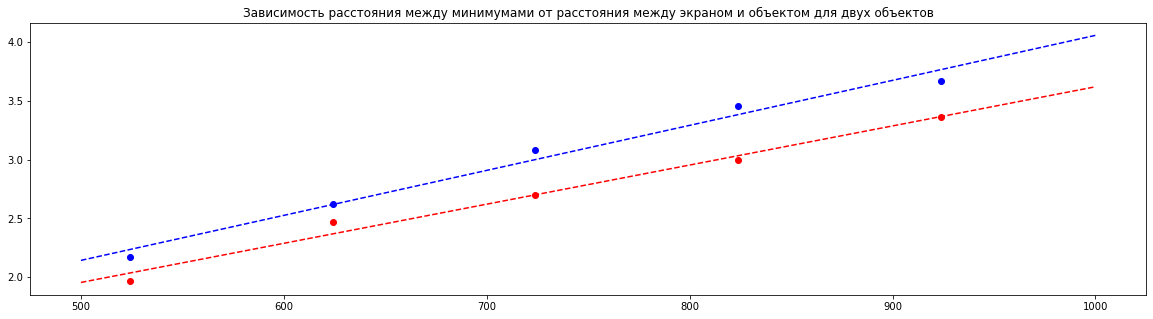

In [76]:
fig, ax = plt.subplots(figsize=(20, 5))
ax.set_title('Зависимость расстояния между минимумами от расстояния между экраном и объектом для двух объектов')
X_33 = X_33.reshape(5)
ax.scatter(X_33, y_33, c='r')
k, b = regr_33.coef_[0], regr_33.intercept_
x = np.linspace(500, 1000, 50)
ax.plot(x, np.polyval([k, b], x), 'r--')

X_32 = X_32.reshape(5)
ax.scatter(X_32, y_32, c='b')
k, b = regr_32.coef_[0], regr_32.intercept_
x = np.linspace(500, 1000, 50)
ax.plot(x, np.polyval([k, b], x), 'b--')

plt.show()

Найдем $d_{33}$ и $d_{32}$, используя $d = \frac{\lambda}{K}$

In [85]:
d_32 = alpha / regr_32.coef_[0]
print('Расстояние между щелями для 32-го объекта: {:.3f} мкм'.format(d_32 * 10 ** 6))

d_33 = alpha / regr_33.coef_[0]
print('Расстояние между щелями для 33-го объекта: {:.3f} мкм'.format(d_33 * 10 ** 6))

Расстояние между щелями для 32-го объекта: 165.083 мкм
Расстояние между щелями для 33-го объекта: 189.846 мкм


Найдем $\overline d$ для расстояния щели по двум точкам

In [88]:
print('Среднее расстояние между щелями: {:.3f} мкм'.format((d_33 + d_32) / 2 * 10 ** 6))

Среднее расстояние между щелями: 177.465 мкм


Найдем погрешность для среднего расстояния между щелями:    
$\Delta K = \sqrt{\frac{\sum(y_i-Kx_i-b)^2}{(n-2)\sum(x_i-\overline{x})^2}}$

$\Delta d = \sqrt{(\frac{\delta d}{\delta \lambda}\cdot \Delta \lambda)^2 +  (\frac{\delta d}{\delta K}\cdot \Delta K)^2 } = \sqrt{(\frac{1}{K}\Delta \lambda)^2 + (\frac{\lambda}{K^2}\Delta K)^2}$

In [128]:
from sklearn.metrics import mean_squared_error

final_k = np.array([(regr_33.coef_[0] + regr_32.coef_[0]) / 2]).reshape(1, 1)
final_b = np.array([(regr_33.intercept_ + regr_32.intercept_) / 2])

Xs = np.concatenate((X_32, X_33))
ys = np.concatenate((y_32, y_33))

mse = mean_squared_error(ys, (final_k * Xs + final_b).reshape(10))


delta_k = np.sqrt(mse / np.sum((Xs - np.mean(Xs)) ** 2))
delta_d = np.sqrt((delta_alpha / final_k[0][0]) ** 2 + (alpha * delta_k / final_k[0][0] ** 2) ** 2)

print('Погрешность для среднего расстояния между щелями: {} мкм'.format(delta_d * 10 ** 6))

Погрешность для среднего расстояния между щелями: 18.444950130275327 мкм


Тогда $d = \overline d + \Delta d = (177 \pm 18) \space мкм$

### Выводы

В ходе данной лабораторной работы был рассмотрен опыт Юнга для вычисления расстояния между щелями с помощью длины волны $\lambda$, расстояния между объектом и экраном $L$, а также расстояния между минимумами интерференционной картинки $\Delta x$. Был найден коэффицент $K=\frac{\lambda}{d}$ с помощью линейной регрессии $\Delta x(L) = \frac{\lambda}{d}\cdot L$, откуда было взято расстояние $d = \frac{\lambda}{K}$. Это расстояние между щелями получилось равным $(177 \pm 18)$ мкм 